Market Segment Analysis for Electric Vehicle

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_excel(r'C:\Users\Jyoshita\OneDrive\Desktop\Projects\Dataset.xlsx')

In [7]:
data.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


Monthly Trend Analysis

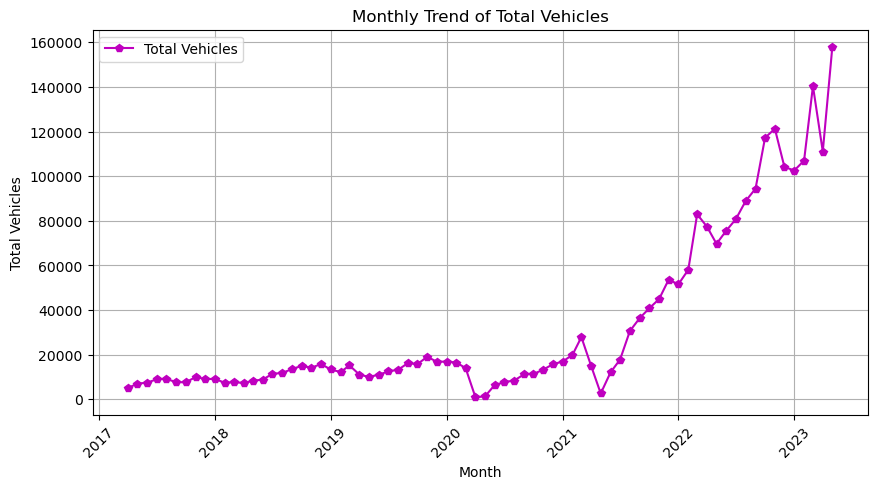

In [17]:
# Plot total vehicle trend
plt.figure(figsize=(10, 5))
plt.plot(data["YEAR"], data["TOTAL"], marker="p", linestyle="-", color="m", label="Total Vehicles")
plt.xlabel("Month")
plt.ylabel("Total Vehicles")
plt.title("Monthly Trend of Total Vehicles")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


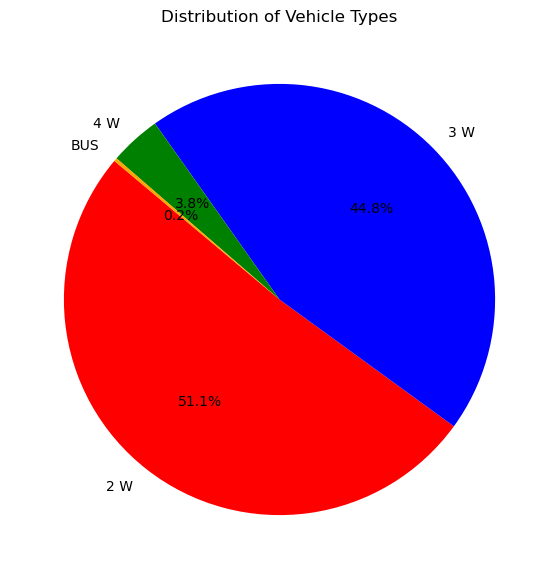

In [18]:
# Summing up total counts of each vehicle type
vehicle_types = ["2 W", "3 W", "4 W", "BUS"]
vehicle_counts = data[vehicle_types].sum()

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(vehicle_counts, labels=vehicle_types, autopct="%1.1f%%", startangle=140, colors=["red", "blue", "green", "orange"])
plt.title("Distribution of Vehicle Types")
plt.show()


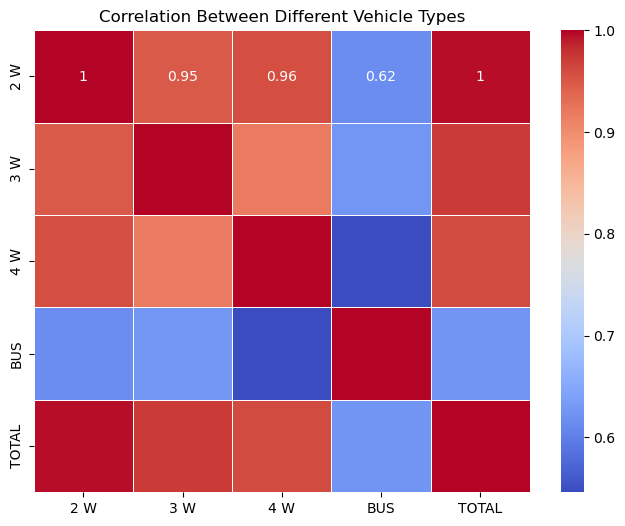

In [19]:
import seaborn as sns

# Compute correlation matrix
corr = data[["2 W", "3 W", "4 W", "BUS", "TOTAL"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Different Vehicle Types")
plt.show()


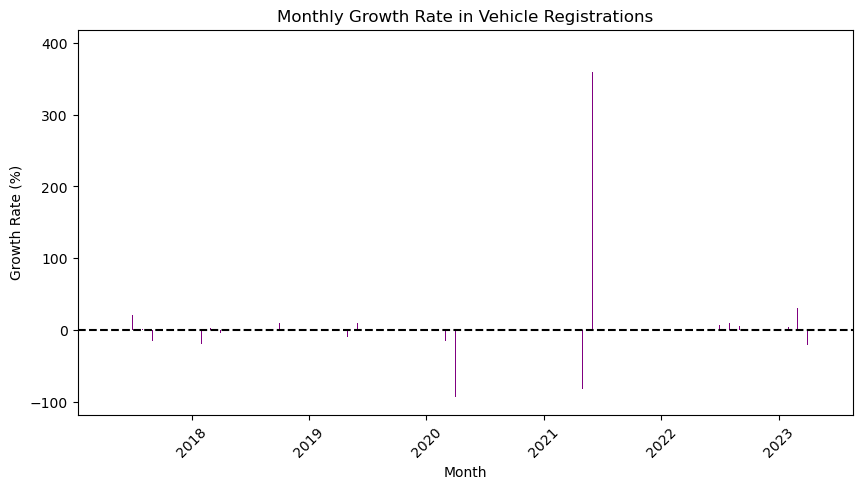

In [20]:
data["Growth Rate"] = data["TOTAL"].pct_change() * 100  # Calculate percentage change

plt.figure(figsize=(10, 5))
plt.bar(data["YEAR"], data["Growth Rate"], color="purple")
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.title("Monthly Growth Rate in Vehicle Registrations")
plt.xticks(rotation=45)
plt.axhline(y=0, color="black", linestyle="--")  # Reference line at 0%
plt.show()


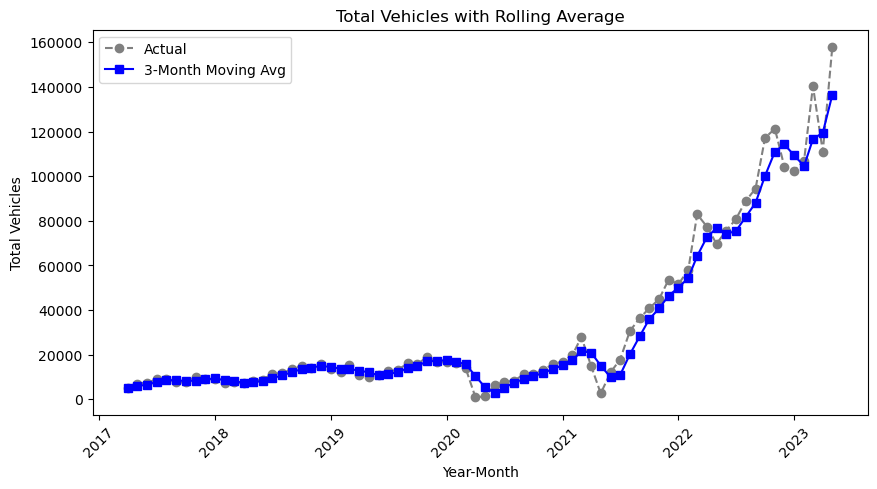

In [21]:
data["Rolling_Avg"] = data["TOTAL"].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(data["YEAR"], data["TOTAL"], marker="o", linestyle="--", color="gray", label="Actual")
plt.plot(data["YEAR"], data["Rolling_Avg"], marker="s", linestyle="-", color="blue", label="3-Month Moving Avg")
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Total Vehicles")
plt.title("Total Vehicles with Rolling Average")
plt.legend()
plt.show()


In [23]:
data["Growth_Rate"] = data["TOTAL"].pct_change() * 100  # Percentage growth rate
highest_growth = data.loc[data["Growth_Rate"].idxmax()]
lowest_growth = data.loc[data["Growth_Rate"].idxmin()]

print("Overall Vehicle Growth Trend:")
print(data[["YEAR", "TOTAL", "Growth_Rate"]])

print("\nMonth with Highest Growth:")
print(highest_growth)

print("\nMonth with Lowest Growth:")
print(lowest_growth)


Overall Vehicle Growth Trend:
         YEAR   TOTAL  Growth_Rate
0  2017-04-01    5042          NaN
1  2017-05-01    7028    39.389131
2  2017-06-01    7465     6.217985
3  2017-07-01    9011    20.709980
4  2017-08-01    9141     1.442681
..        ...     ...          ...
69 2023-01-01  102545    -1.559950
70 2023-02-01  106977     4.322005
71 2023-03-01  140360    31.205773
72 2023-04-01  111048   -20.883443
73 2023-05-01  157788    42.089907

[74 rows x 3 columns]

Month with Highest Growth:
YEAR           2020-06-01 00:00:00
2 W                           1511
3 W                           4662
4 W                            295
BUS                              0
TOTAL                         6468
Growth Rate             393.740458
Rolling_Avg                 2912.0
Growth_Rate             393.740458
Name: 38, dtype: object

Month with Lowest Growth:
YEAR           2020-04-01 00:00:00
2 W                             85
3 W                            870
4 W                         

In [24]:
data["2W_Contribution"] = (data["2 W"] / data["TOTAL"]) * 100
data["3W_Contribution"] = (data["3 W"] / data["TOTAL"]) * 100
data["4W_Contribution"] = (data["4 W"] / data["TOTAL"]) * 100
data["BUS_Contribution"] = (data["BUS"] / data["TOTAL"]) * 100

def classify_segment(row):
    max_value = max(row["2W_Contribution"], row["3W_Contribution"], row["4W_Contribution"], row["BUS_Contribution"])
    if max_value == row["2W_Contribution"]:
        return "2W Dominant"
    elif max_value == row["3W_Contribution"]:
        return "3W Dominant"
    elif max_value == row["4W_Contribution"]:
        return "4W Dominant"
    else:
        return "Bus Dominant"

data["Segment"] = data.apply(classify_segment, axis=1)

print("Vehicle Type Contribution Segmentation:")
print(data[["YEAR", "2W_Contribution", "3W_Contribution", "4W_Contribution", "BUS_Contribution", "Segment"]])


Vehicle Type Contribution Segmentation:
         YEAR  2W_Contribution  3W_Contribution  4W_Contribution  \
0  2017-04-01         1.904006        94.168981         3.927013   
1  2017-05-01         1.294821        95.617530         3.059192   
2  2017-06-01         1.835231        96.155392         1.995981   
3  2017-07-01         1.287316        97.380979         1.331706   
4  2017-08-01         1.083032        97.418226         1.498742   
..        ...              ...              ...              ...   
69 2023-01-01        63.044517        33.456531         3.403384   
70 2023-02-01        61.726352        33.647420         4.533685   
71 2023-03-01        61.409233        32.220718         6.306640   
72 2023-04-01        60.113645        34.233845         5.576868   
73 2023-05-01        66.642584        28.275281         4.902781   

    BUS_Contribution      Segment  
0           0.000000  3W Dominant  
1           0.028458  3W Dominant  
2           0.013396  3W Dominant  

In [25]:
avg_total = data["TOTAL"].mean()

data["Registration_Level"] = data["TOTAL"].apply(lambda x: "High Registration" if x > avg_total else "Low Registration")

print("High vs. Low Registration Periods:")
print(data[["YEAR", "TOTAL", "Registration_Level"]])


High vs. Low Registration Periods:
         YEAR   TOTAL Registration_Level
0  2017-04-01    5042   Low Registration
1  2017-05-01    7028   Low Registration
2  2017-06-01    7465   Low Registration
3  2017-07-01    9011   Low Registration
4  2017-08-01    9141   Low Registration
..        ...     ...                ...
69 2023-01-01  102545  High Registration
70 2023-02-01  106977  High Registration
71 2023-03-01  140360  High Registration
72 2023-04-01  111048  High Registration
73 2023-05-01  157788  High Registration

[74 rows x 3 columns]
